# Unicorn companies
A unicorn company according to [Investopia](https://www.investopedia.com/terms/u/unicorn.asp) refers to a privately held startup company with a value of over $1 billion. It is commonly used in the venture capital industry. The term was first popularized by venture capitalist Aileen Lee. Unicorns are very rare and require innovation. Because of their sheer size, unicorn investors tend to be private investors or venture capitalists, which means they are out of the reach of retail investors. Although it isn't necessary, many unicorns work their way to going public. 

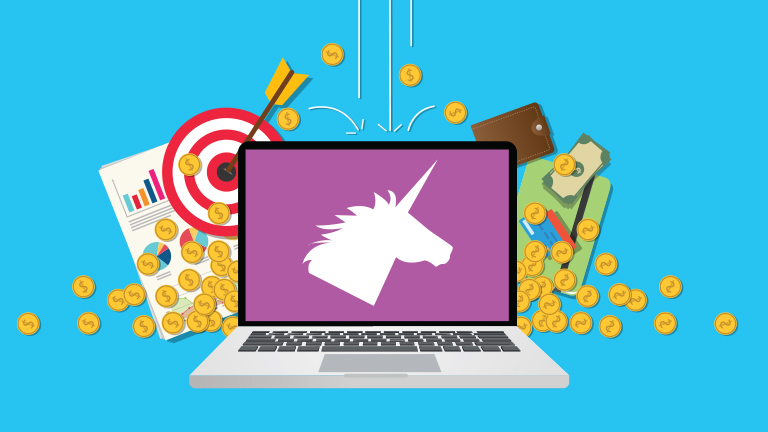

Let's dive into a dataset provided by [DataCamp](https://app.datacamp.com/workspace/overview)

First we import the libraries that are needed for the exploration of the dataset

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Then we look at the dataset for a better understanding of the information

In [37]:
df=pd.read_csv("unicorns.csv")
df.head()

,company,country,continent,company_id,year_founded,year_joined,valuation,industry
0,Otto Bock HealthCare,Germany,Europe,189,1919,2017,4000000000,Health
1,Matrixport,Singapore,Asia,848,2019,2021,1000000000,Fintech
2,Cloudinary,United States,North America,556,2011,2022,2000000000,Internet software & services
3,PLACE,United States,North America,999,2020,2021,1000000000,Internet software & services
4,candy.com,United States,North America,396,2021,2021,2000000000,Fintech


In [38]:
#Verifiy missing values
df.isnull().sum()

company         0
country         0
continent       0
company_id      0
year_founded    0
year_joined     0
valuation       0
industry        0
dtype: int64

In [39]:
#View descriptive stadistics
df.describe()

,company_id,year_founded,year_joined,valuation
count,1074.000000,1074.000000,1074.000000,1.074000e+03
mean,536.500000,2012.895717,2019.896648,3.455307e+09
std,310.181399,5.698573,2.001288,8.547022e+09
min,0.000000,1919.000000,2007.000000,1.000000e+09
25%,268.250000,2011.000000,2019.000000,1.000000e+09
50%,536.500000,2014.000000,2021.000000,2.000000e+09
75%,804.750000,2016.000000,2021.000000,3.000000e+09
max,1073.000000,2021.000000,2022.000000,1.800000e+11


In [40]:
# visualize the data types
df.dtypes

company         object
country         object
continent       object
company_id       int64
year_founded     int64
year_joined      int64
valuation        int64
industry        object
dtype: object

In [41]:
#For a more readable format of the valuation column, the commas are added
df["valuation"]=df["valuation"].map('{:,d}'.format)

Now it's time to see information about the companies

In [42]:
# We want to know the most valuable company, for that we filter by using the valuation feature of the dataset
most_valuable_company=df[df["valuation"]==df["valuation"].max()]
most_valuable_company

,company,country,continent,company_id,year_founded,year_joined,valuation,industry
449,Stripe,United States,North America,3,2010,2014,"95,000,000,000",Fintech


[ByteDance](https://www.bytedance.com/en/) is a technology company operating a range of content platforms that inform, educate, entertain and inspire people across languages, cultures, and geographies.

Dedicated to building global platforms of creation and interaction, ByteDance now has a portfolio of applications available in over 150 markets and 75 languages. For example, TikTok, Helo, Vigo Video, Douyin, and Huoshan.

ByteDance's platforms aim to help users explore and discover the world's creativity, knowledge and moments that matter in everyday life while empowering everyone to be a creator directly from their smartphones.

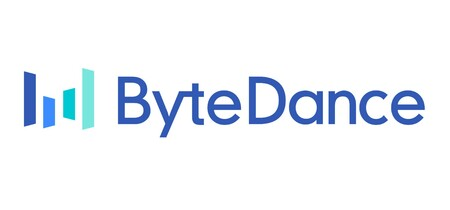

In [43]:
#Know we do the same with the less valuable unicorn companies
less_valuable_companies=df[df["valuation"]==df.valuation.min()]
print("Number of companies that are the less valuable: ",len(less_valuable_companies))
print("Amount of money that they're worth it:",df.valuation.min())

Number of companies that are the less valuable:  471
Amount of money that they're worth it: 1,000,000,000


There are 471 companies that have a valuation of 1B dollars. Which is the minimum valuation needed to be considered a unicorn company

<Figure size 720x864 with 0 Axes>

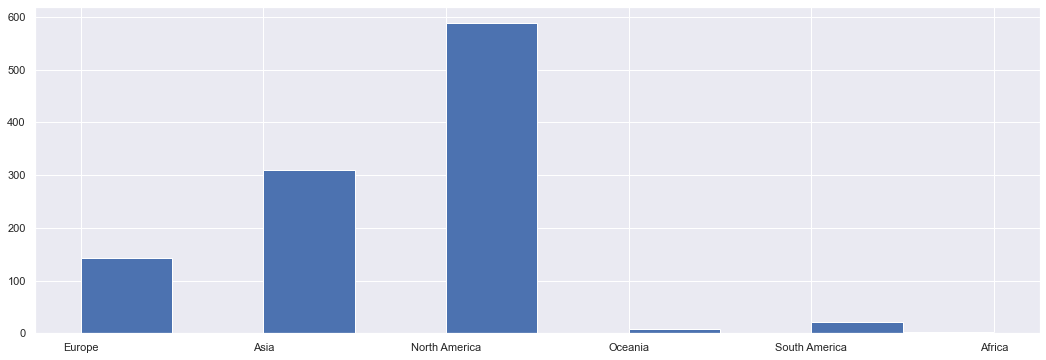

In [44]:
plt.hist(x=df["continent"])
plt.Figure(figsize=(10,12))

As we can see from this insight North America and South America are in two columns, which in my point of view is not correct, if we want to compare across continents, let's merge this values from **continents** into one

In [45]:
# let's create a function to fix this
def rename_cells(column,old_values,new_value):
    for i in range(len(old_values)):
        df[column]=df[column].replace(old_values[i],new_value)
    return df


In [46]:
rename_cells("continent",["North America","South America"],"America")
# To visualize if this has fixed the problem we use unique method from pandas
df.continent.unique()


array(['Europe', 'Asia', 'America', 'Oceania', 'Africa'], dtype=object)

Let's try to do the same graph as before, but with the corrections made using the function

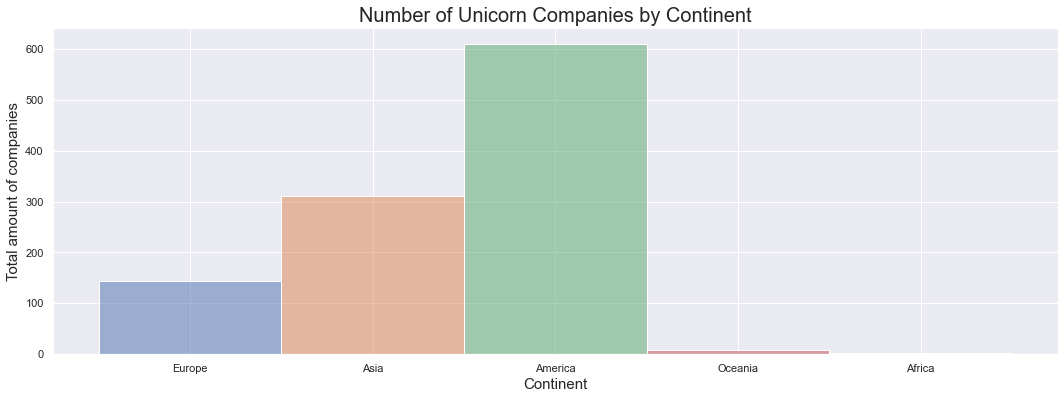

In [47]:
sns.histplot(x="continent",data=df,hue="continent",legend=False)
plt.title("Number of Unicorn Companies by Continent",fontsize=20)
plt.xlabel("Continent",fontsize=15)
plt.ylabel("Total amount of companies",fontsize=15)
plt.show()

**Oceania** and **Africa** have few unicorn companies if we compare them with the other 3 continents, let's take a look at the numbers.

In [48]:
unicorns_by_continent=df.groupby(["continent"]).count().iloc[:,0]
unicorns_by_continent

continent
Africa       3
America    610
Asia       310
Europe     143
Oceania      8
Name: company, dtype: int64

Africa only has 3 unicorn companies, while Oceania only has 8 companies that can be considered unicorns, this is shocking comparing this to the other countries. Let's see the percentage of unicorn companies by continent.

In [49]:
(unicorns_by_continent)*100/(unicorns_by_continent.sum())

continent
Africa      0.279330
America    56.797020
Asia       28.864060
Europe     13.314711
Oceania     0.744879
Name: company, dtype: float64

As we can see America is the clear winner in the number of unicorn companies in the continent with 57% percent of the total amount of unicorn companies, followed by Asia with 28%, Europe with 13%, and the rest is divided between Africa and Oceania.

With that been said, let's see the countries with more unicorn companies around the world.

In [50]:
# Let's use a function to use n quantity of countries for the top
def top_n(top_limit):
    countries=df.groupby("country")["company"].count().reset_index()
    # Then we query by the max ressult
    top=countries["company"].nlargest(n=top_limit)
    # Finally we do an inner join
    return countries.merge(top,how="inner",on="company").sort_values(by=["company"],ascending=False)



In [51]:
top10=top_n(10)
top10

,country,company
10,United States,562
2,China,173
5,India,65
9,United Kingdom,43
4,Germany,26
3,France,24
6,Israel,20
1,Canada,19
0,Brazil,16
7,Singapore,12


Let's see the same info in a graph

In [61]:
def plot_top(x,y,data, top,fs_title,fs_xy):
    sns.barplot(x=x,y=y,data=data)
    sns.set(rc={'figure.figsize':(18,6)})
    title="Top %s countries with more unicorn companies" % top
    plt.title(title,fontsize=fs_title)
    plt.xlabel("Country",fontsize=fs_xy)
    plt.ylabel("Total amount of companies",fontsize=fs_xy)
    plt.show()

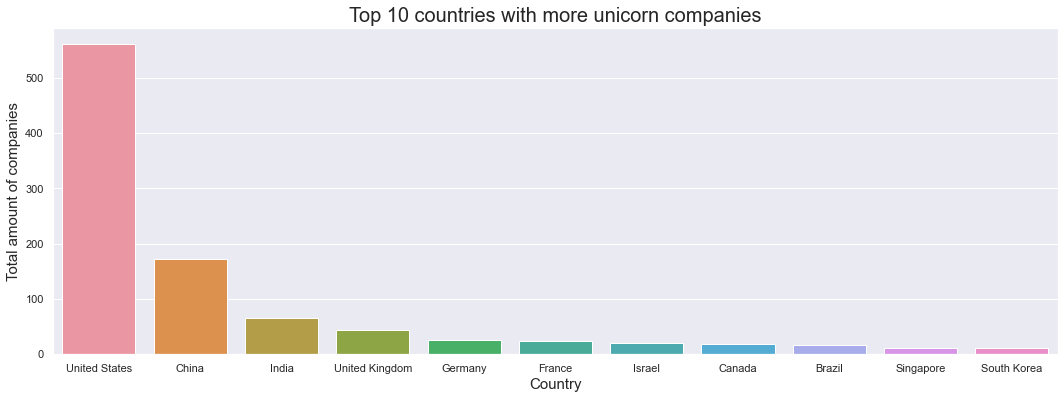

In [62]:
plot_top("country","company",top10,10,20,15)

As we can see the first 5 countries have more unicorn companies than the others, let's visualize the graph with only the top 5.

In [55]:
top5=top_n(5)
top5

,country,company
4,United States,562
0,China,173
2,India,65
3,United Kingdom,43
1,Germany,26


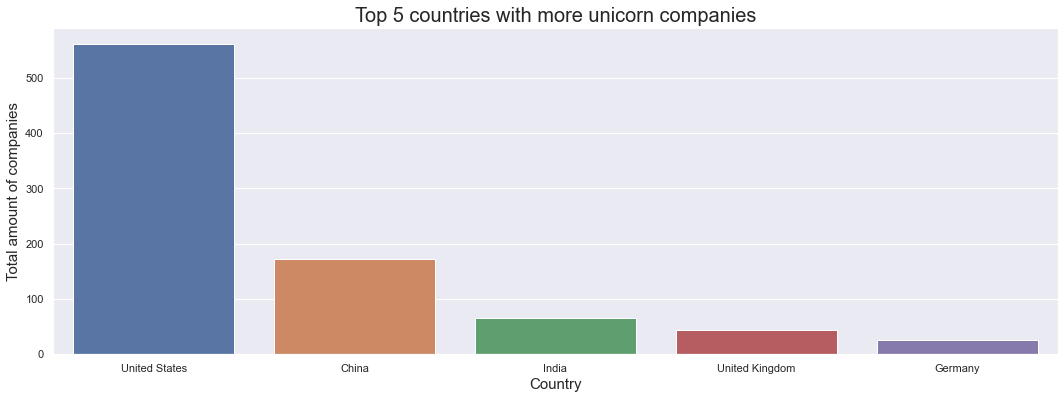

In [56]:
plot_top("country","company",top5,5,20,15)

By the way it's useful to know on average, the time between the foundation of a company and the date it joined to the unicorn category.

In [60]:
df.head()

,company,country,continent,company_id,year_founded,year_joined,valuation,industry
0,Otto Bock HealthCare,Germany,Europe,189,1919,2017,"4,000,000,000",Health
1,Matrixport,Singapore,Asia,848,2019,2021,"1,000,000,000",Fintech
2,Cloudinary,United States,America,556,2011,2022,"2,000,000,000",Internet software & services
3,PLACE,United States,America,999,2020,2021,"1,000,000,000",Internet software & services
4,candy.com,United States,America,396,2021,2021,"2,000,000,000",Fintech


In [65]:
# for that it's necessary to create a new column, that contains the difference between the year_joined and year_founded
df["years_needed"]=df["year_joined"]-df["year_founded"]
# then we obtain the average, to determine the time that normally takes for a company to become a unicorn
round(df["years_needed"].mean())

7

Generally, **it takes 7 years for a company since it's foundation** to be considered a Unicorn company, the next thing to do, is to see the company that took longer to be consider unicorn, and the ones that took less time.

In [71]:
#companies that took longer
longest=df[df["years_needed"]==df["years_needed"].max()]
longest

,company,country,continent,company_id,year_founded,year_joined,valuation,industry,years_needed
0,Otto Bock HealthCare,Germany,Europe,189,1919,2017,"4,000,000,000",Health,98


In [72]:
less=df[df["years_needed"]==df["years_needed"].min()]
less

,company,country,continent,company_id,year_founded,year_joined,valuation,industry,years_needed
89,Yidian Zixun,China,Asia,714,2021,2017,"1,000,000,000",Mobile & telecommunications,-4


As we can see the year_joined and year_founded are in the incorrect order, let's see how many columns present this problem

In [73]:
wrong_dates=df[df["years_needed"]<0]
wrong_dates

,company,country,continent,company_id,year_founded,year_joined,valuation,industry,years_needed
89,Yidian Zixun,China,Asia,714,2021,2017,"1,000,000,000",Mobile & telecommunications,-4


Luckily only one record present this problem, but if we got more records with this problem, we will have troubles, let's fix this with a function

In [74]:
def swap_values(dataframe,condition,first_column,second_column,column_to_fix):
    if condition == True:
        to_replace_first_column=dataframe[first_column]
        to_replace_second_column=dataframe[second_column]
        dataframe[first_column]=to_replace_second_column
        dataframe[second_column]=to_replace_first_column
        dataframe[column_to_fix]=dataframe[second_column]-dataframe[first_column]
        return dataframe
    else:
        return dataframe




In [75]:
df2=swap_values(df,df[df["years_needed"]<0],"year_founded","year_joined","years_needed")
df2

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().